In [1]:
import numpy as np
import math, random

from math import sqrt, cos, sin, pi
from numpy import abs

import matplotlib.pyplot as plt

from typing import List, Tuple

from shapely import affinity, distance
from shapely.geometry import Polygon, Point, LinearRing, LineString
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.ops import transform

Creating polygon

Model 5-4

In [3]:
vertices = [(4.0, 0.0), (0.0, 4.0), (-4.0, 0.0), (0.0, -4.0), (4.0, 0.0)]
r, rc, R = 4.0, 4.0/sqrt(2), 1.0
pplg = LinearRing(vertices)

delta = 0.4
steps = int((r-rc)/delta)

Solution

In [4]:
opts = []
n = 20000

ppts = []
ppts.append(Point(pplg.coords[0][0], pplg.coords[0][1]))
for i in reversed(range(len(pplg.coords)-1)):
    ppts.append(Point(pplg.coords[i][0], pplg.coords[i][1]))
cplg = LinearRing(ppts)

for i in range(n):
    phi = (i / n)*2.0*pi
    opts.append(Point(r*cos(phi), r*sin(phi)))
oplg = LinearRing(opts)

# plot_line(oplg, add_points=False, color=(1,0,0), alpha=1)
# plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)

# plt.autoscale()
# plt.show()

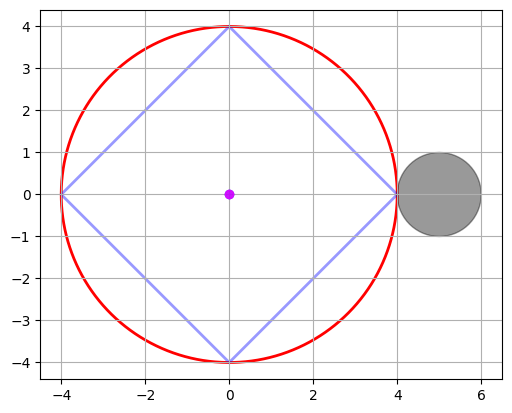

In [5]:
x0, y0, angle = 0.0, 0.0, 0.0
cplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), oplg), angle, origin = (-x0, -y0))
oplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), cplg), angle, origin = (-x0, -y0))
circle = Point(oplgmod.bounds[2]+R, 0.0).buffer(R)

plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplgmod, add_points=False, color=(0,0,1), alpha=0.4)
plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.4)

plt.autoscale()
plt.show()

In [6]:
n = 10000

cpts = []
opts = []
ang = []

maxdst = 0.0
maxi = 0
for i in range(n):
    phi = (i / n)*2.0*pi
    ln = LineString([(x0, y0), (2*r*cos(phi), 2*r*sin(phi))])
    cpt = cplg.intersection(ln)
    opt = oplg.intersection(ln)
    dst = sqrt((opt.x-cpt.x)**2+(opt.y-cpt.y)**2)
    if dst > maxdst:
        maxdst = dst
        maxi = i
    cpts.append(cpt)
    opts.append(opt)
    ang.append(phi)

In [7]:
m = steps+2

n = 10000

plg = []
trcplg = []
for j in range(m):
    if j <= steps:
        if j < steps:
            dst = delta*(j+1)/4
        else:
            dst = (1-1/sqrt(2))
        d = 4*(dst**2-2*dst)/((1-dst)**4)
        A = 2*(1+d)/(1-d)
        B = 4/(1-d)

        pts = []
        trcpts = []

        pts.append(Point(0.0, 4.0))
        trcpts.append(Point(0.0, 4.0+R))

        for i in range(1, n):
            u = i / n
            v = sqrt((u**3+A*u**2+u)/B)
            x = 4*u/v
            y = -4*(u-1)/((u+1))
            pts.append(Point(x, y))

            # x = (4+R)*u/v
            # y = -(4+R)*(u-1)/((u+1))
            # trcpts.append(Point(x, y))

            nrmx = 2*u*(1-u**2)/(sqrt((u**3+A*u**2+u)/B)**3*B)
            nrmy = -8/(u+1)**2
            nrm = sqrt(nrmx**2+nrmy**2)
            xn = x-nrmy*R/nrm
            yn = y+nrmx*R/nrm
            trcpts.append(Point(xn, yn))

        for i in range(n, 0, -1):
            u = i / n
            v = sqrt((u**3+A*u**2+u)/B)
            x = 4*u/v
            y = 4*(u-1)/((u+1))
            pts.append(Point(x, y))

            # x = (4+R)*u/v
            # y = (4+R)*(u-1)/((u+1))
            # trcpts.append(Point(x, y))

            nrmx = 2*u*(1-u**2)/(sqrt((u**3+A*u**2+u)/B)**3*B)
            nrmy = 8/(u+1)**2
            nrm = sqrt(nrmx**2+nrmy**2)
            xn = x+nrmy*R/nrm
            yn = y-nrmx*R/nrm
            trcpts.append(Point(xn, yn))

        pts.append(Point(0.0, -4.0))
        trcpts.append(Point(0.0, -4.0-R))

        for i in range(1, n):
            u = i / n
            v = -sqrt((u**3+A*u**2+u)/B)
            x = 4*u/v
            y = 4*(u-1)/((u+1))
            pts.append(Point(x, y))

            # x = (4+R)*u/v
            # y = (4+R)*(u-1)/((u+1))
            # trcpts.append(Point(x, y))

            nrmx = 2*u*(1-u**2)/(sqrt((u**3+A*u**2+u)/B)**3*B)
            nrmy = -8/(u+1)**2
            nrm = sqrt(nrmx**2+nrmy**2)
            xn = x+nrmy*R/nrm
            yn = y-nrmx*R/nrm
            trcpts.append(Point(xn, yn))

        for i in range(n, 0, -1):
            u = i / n
            v = -sqrt((u**3+A*u**2+u)/B)
            x = 4*u/v
            y = -4*(u-1)/((u+1))
            pts.append(Point(x, y))

            # x = (4+R)*u/v
            # y = -(4+R)*(u-1)/((u+1))
            # trcpts.append(Point(x, y))

            nrmx = -2*u*(1-u**2)/(sqrt((u**3+A*u**2+u)/B)**3*B)
            nrmy = -8/(u+1)**2
            nrm = sqrt(nrmx**2+nrmy**2)
            xn = x+nrmy*R/nrm
            yn = y-nrmx*R/nrm
            trcpts.append(Point(xn, yn))

        plg.append(LinearRing(pts))
        trcplg.append(LinearRing(trcpts))
    else:
        plg.append(LinearRing(cpts))

        edg = []
        pts = []
        trcpts = []

        for i in range(len(cplg.coords)-1):
            r = math.sqrt((cplg.coords[i+1][0]-cplg.coords[i][0])**2+(cplg.coords[i+1][1]-cplg.coords[i][1])**2)
            edg.append(((cplg.coords[i+1][0]-cplg.coords[i][0])/r, (cplg.coords[i+1][1]-cplg.coords[i][1])/r, r))

        for i in range(len(cplg.coords)-1):
            trcpts.append(Point(cplg.coords[i][0]-edg[i][1]*R, cplg.coords[i][1]+edg[i][0]*R))
            trcpts.append(Point(cplg.coords[i+1][0]-edg[i][1]*R, cplg.coords[i+1][1]+edg[i][0]*R))

        for i in range(0, len(trcpts)-1, 2):
            # n = 1000
            # line
            pt1 = trcpts[i]
            pt2 = trcpts[i+1]
            # line = []
            for j in range(n): 
                alpha = j / n
                x = (1-alpha)*pt1.x+alpha*pt2.x
                y = (1-alpha)*pt1.y+alpha*pt2.y
                # line.append((x, y))
                pts.append(Point(x, y))
            # lines.append(line)

            # n = 10000
            # circle
            pt1 = trcpts[i+1]
            if i+2 == len(trcpts):
                pt2 = trcpts[0]
            else:
                pt2 = trcpts[i+2]
            angle1 = math.atan2(pt1.y-cplg.coords[int((i+2)/2)][1], pt1.x-cplg.coords[int((i+2)/2)][0])
            angle2 = math.atan2(pt2.y-cplg.coords[int((i+2)/2)][1], pt2.x-cplg.coords[int((i+2)/2)][0])
            if angle1 < 0.0 and angle2 > 0.0:
                angle2 -= 2.0*math.pi
            # circle = []
            for j in range(n): 
                alpha = j / n
                phi = (1-alpha)*angle1+alpha*angle2
                x = R*math.cos(phi)+cplg.coords[int((i+2)/2)][0]
                y = R*math.sin(phi)+cplg.coords[int((i+2)/2)][1]
                # circle.append((x, y))
                pts.append(Point(x, y))
            # circles.append(circle)

        trcplg.append(LinearRing(pts))

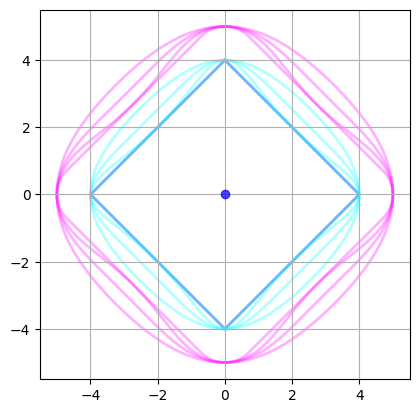

In [8]:
# plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_line(oplgmod, add_points=False, color=(0,0,1), alpha=0.4)
for j in range(m):
    plot_line(plg[j], add_points=False, color=(0,1,1), alpha=0.3)
for j in range(m):
    plot_line(trcplg[j], add_points=False, color=(1,0,1), alpha=0.3)

plt.autoscale()
plt.show()

In [9]:
ln = LineString([(0.0, 0.0), (100.0, 0.0)])
x = []
y = []
dst = []
n = 100

dst.append(0.0)
for j in range(m):
    pt1 = affinity.rotate(trcplg[j], 0.0, origin=Point(0.0,0.0)).intersection(ln)
    for i in range(1, n):
        angle = i*360.0/n+360.0*j
        pt2 = affinity.rotate(trcplg[j], angle, origin=Point(0.0,0.0)).intersection(ln)
        x.append(angle)
        y.append(pt2.x)
        dst.append(dst[-1]+sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2))
        pt1 = pt2

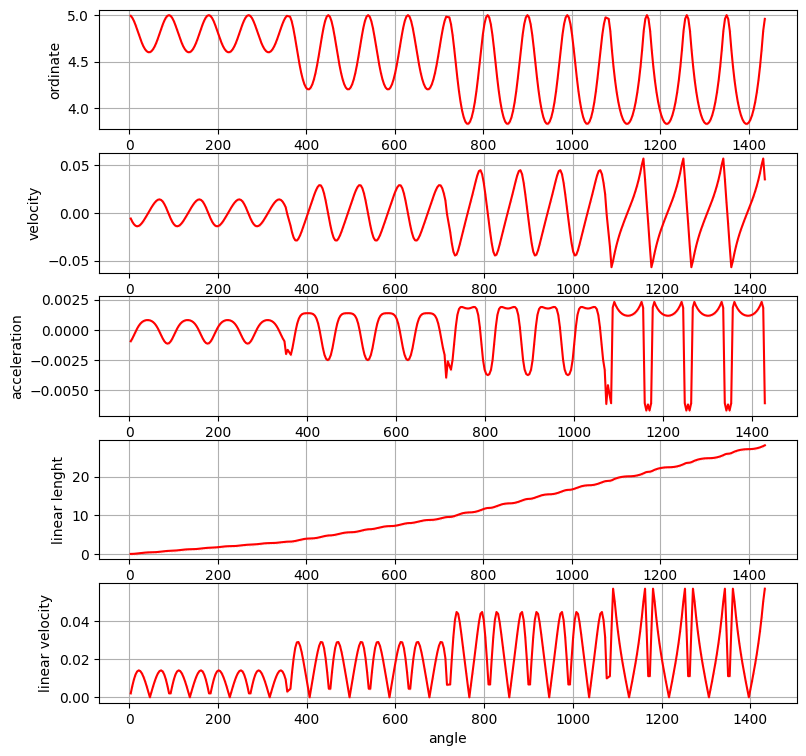

In [10]:
d1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, y[1:], y)]
d2 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, d1[1:], d1)]
dst1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, dst[1:], dst)]

fig, axs = plt.subplots(5, 1)
fig.set_size_inches(9.0, 9.0)

axs[0].plot(x, y, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('ordinate')
axs[0].grid(True)

axs[1].plot(x[:-1], d1, marker='.', color="red", markersize=0.1)
axs[1].set_ylabel('velocity')
axs[1].grid(True)

axs[2].plot(x[:-2], d2, marker='.', color="red", markersize=0.1)
axs[2].set_ylabel('acceleration')
axs[2].grid(True)

axs[3].plot(x, dst[:-1], marker='.', color="red", markersize=0.1)
axs[3].set_ylabel('linear lenght')
axs[3].grid(True)

axs[4].plot(x[:-1], dst1, marker='.', color="red", markersize=0.1)
axs[4].set_xlabel('angle')
axs[4].set_ylabel('linear velocity')
axs[4].grid(True)

plt.show()